In [1]:
from konlpy.tag import Okt
import re
okt=Okt()
token=re.sub("[.!#~]","",'비가 오니 마음이 차분해지네요 요즘 너무 더웠어요 비가 오니 마음이 기쁘네요.')
token=okt.morphs(token)
word2index={}
bow=[]
for voca in token:
    if voca not in word2index.keys():
        word2index[voca]=len(word2index)
        bow.insert(len(word2index)-1,1)
    else:
        index=word2index.get(voca)
        bow[index]=bow[index]+1
    
print(word2index)
print(bow)

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}
[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']
vector=CountVectorizer()
vector.fit(corpus)
print(vector.vocabulary_)
print(vector.transform(line).toarray())

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [3]:
corpus=['''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산
챙기는 게 더 좋습니다.''']
vector=CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [5]:
f=open('c:/data/text/news1.txt',encoding='utf-8')
corpus=f.read()
txt=okt.nouns(corpus)
txt2=[' '.join(txt)]
txt2

['대체 토큰 게임 가상 공간 카드 아이템 거래 수 카드 게임 내 경쟁 요소 작용 때문 유저 객 기업 매출 면 기존 게임 운영 지난 여름 계획 잡고 업체 미팅 프로젝트 본격 황 인수 레티아드 대표 현재 개발 포트리스 아레나 대해 말 지난해 설립 개발 사 레티아드 준비 포트리스 아레나 과 포트리스 계약 게임 통해 레 티아 지난해 스팀 공개 포트리스 관련 최초 게임 개발 포트리스 속 탱크 카드 로 초 대표 팀 대전 게임 김 포트리스 기술 적용 모습 지난해 설립 신생 개발 사 레티아드 최 우선 과제 포트리스 게임 개발 최근 게임 돈 버 플레이 투 비즈니스 모델 게임 트렌드 게임 관련 시장 앞서 시장 개척 위메이드 미르 글로벌 버전 통해 성과 글로벌 시장 진출 과 수요 층 확보 두 마리 토끼 잡 기회 평가 블록 체인 플랫폼 구축 시간 자금 소요 만큼 위메이드 위 믹스 활성화 플랫폼 게임 론칭하 사례 증가 모습 포트리스 아레나 일러스트 사진 레티아드 레 티아 시장 안착 블록 체인 플랫폼 게임 리지 대신 파트너 확보 자체 거래소 구축 계획 과 계약 통해 콘텐츠 확보 한편 랜딩 페이지 거래소 밸류 체인 예정 김충 연 레티아드 핫 접근 때 유저 우리 게임 대해 고민 며 충족 조건 게임 생각 것 말 포트리스 를 기반 개발 포트리스 아레나 게임 기본 구조 설계 게임 내 주요 캐릭터 볼 수 탱크 를 아이템 화해 수집 수 방식 레 티아 달 말 내년 초 랜딩 페이지 관련 카드 판매 계획 이후 내년 쯤 베타 테스트 진행 기존 구매 카드 활용 수 것 목표 포트리스 아레나 기존 포트리스 게임 차별성 레 티아 포트리스 게임 정체 계승 멀티플레이 위주 게임 방식 변주 형태 게임 설계 온라인 전투 베이스 기존 게임 달리 싱글플레이 위주 콘텐츠 경험 이후 최종 아레나 유저 대결 집중 방식 포트리스 아레나 사진 레티아드 김충 연 기존 포트리스 게임 다대 의 섬멸 전 위주 전투 중심 며 포트리스 아레나 게임 특성 카드 구매 통해 나 덱 부대 전략 운용 플레이 차별 줄 생각 설명 실제 기존 포트리스 

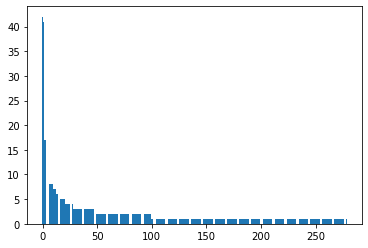

In [8]:
import numpy as np
import matplotlib.pyplot as plt
vect=CountVectorizer().fit(txt2)
count=vect.transform(txt2).toarray().sum(axis=0)
idx=np.argsort(-count)
count=count[idx]
feature_name=np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)),count)
plt.show()

In [9]:
vector=CountVectorizer(stop_words=['등'])
print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)

[[ 1  1  1  3  1 17  1  2  1  1  3  1 41  1  1  1  2  2  1  3  7  2  1  2
   1  1  6  2  1  1  2  1  1  5  1  2  1  1  1  8  1  5  1  3  1  1  1  1
   3  1  1  1  1  1  1  1  1  1  5  1  3  1  1  1  3  1  1  3  9  8  2  1
   1  1  2  1  2  1  1  1  1  2  3  2  2  1  1  2  1  5  1  1  1  9  1  2
   2  1  1  1  5  2  1  1  1  2  1  2  1  1  2  1  4  1  1  3  2  3  1  2
   2  2  2  1  1  1  1  2  1  1  1  1  1  2  8  1  1  1  5  1  1  2  1  1
   1  1 17  1  2  1  1  1  1  2  1  1  1  2  1  1  2  1  1  1  1  2  3  4
   2  7  1  1  1  1  1  1  3  2  2  4  1  1  2  1  1  2  1  1  1  1  1  1
   1  2  3  1  1  1  1  1  1  1  1  3  1  1  1  1  2  4  1  1  1  2  2  2
   1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  6  2  1  2  4  1  1  1  2
   1  2  1  4  1  1  1  1  1  8  1  1  1  7  1  2  1  3  1 42  1  2  3  3
   1  2  1  1  3  2  1  1  4  1  1  1  1  1  1]]
{'대체': 56, '토큰': 247, '게임': 12, '가상': 1, '공간': 22, '카드': 231, '아이템': 148, '거래': 9, '경쟁': 16, '요소': 160, '작용': 187, '때문': 65, '유저': 169, '